# BÀI TẬP PHÂN TÍCH PHÂN LỚP, PHÂN BIỆT

## Bài 1:

### a) Nhập dữ liệu **measure** vào R.

In [1]:
data = read.csv('measure.csv')
head(data)

,sex,chest,waist,hips
,<chr>,<int>,<int>,<int>
1,male,34,30,32
2,male,37,32,37
3,male,38,30,36
4,male,36,33,39
5,male,38,29,33
6,male,43,32,38


In [2]:
data_numeric <- data[, c("chest", "waist", "hips")]

### b) Tính khoảng cách Euclide giữa các biến _"chest"_, _"waist"_, _"hips"_.

In [3]:
dm <- dist(data_numeric)
dm

           1         2         3         4         5         6         7
2   6.164414                                                            
3   5.656854  2.449490                                                  
4   7.874008  2.449490  4.690416                                        
5   4.242641  5.099020  3.162278  7.483315                              
6  11.000000  6.082763  5.744563  7.141428  7.681146                    
7  12.041595  5.916080  7.000000  5.000000 10.049876  5.099020          
8   8.944272  3.741657  4.000000  3.741657  7.071068  5.744563  4.123106
9   7.810250  3.605551  2.236068  5.385165  4.582576  3.741657  5.830952
10 10.099505  4.472136  4.690416  5.099020  7.348469  2.236068  3.316625
11  7.000000  8.306624  6.403124  9.848858  5.744563 11.045361 12.083046
12  7.348469  7.071068  5.477226  8.246211  6.000000  9.949874 10.246951
13  7.810250  8.544004  7.280110  9.433981  7.549834 12.083046 11.916375
14  8.306624 11.180340  9.643651 12.449900  8.66025

### c) Tạo khung vẽ đồ thị gồm 2 hàng và 3 cột. Vẽ 3 biểu đồ dendrogram ở hàng trên và 3 đồ thị về hai thành phần chính đầu tiên tương ứng với 3 phương pháp _“single”_, _“complete”_, _“average”_. Vẽ đường thẳng cắt ngang $y = 3.8$, $y = 7.5$ và $y = 5.5$ tương ứng trong 3 biểu đồ dendrogram.

In [4]:
pca <- princomp(data_numeric, cor = TRUE)

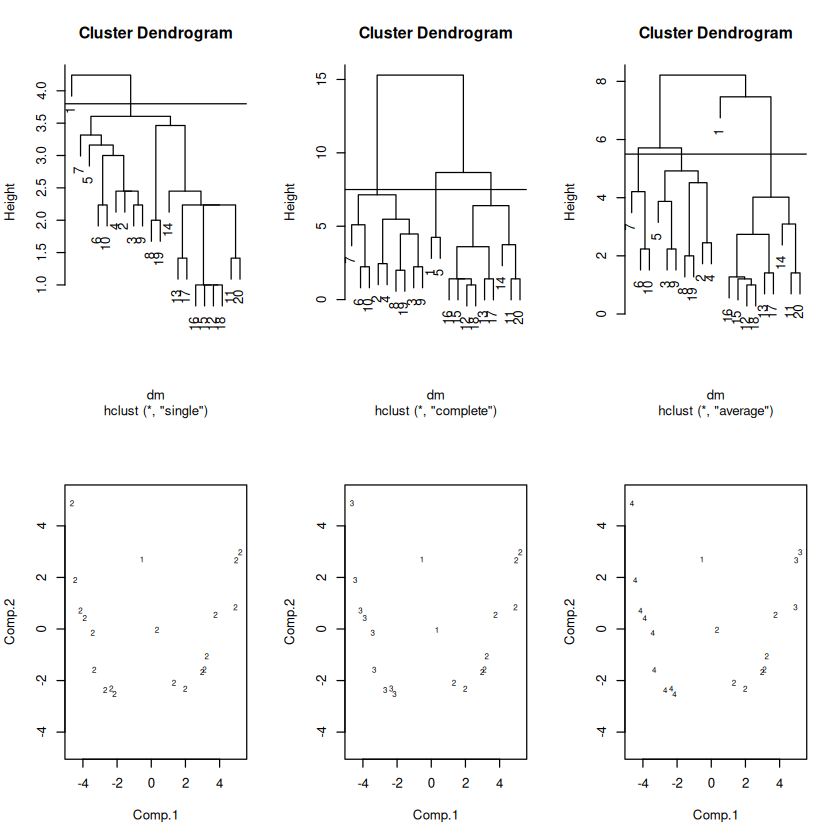

In [5]:
par(mfrow=c(2, 3))

plot(cs <- hclust(dm, method = "single"))
abline(h = 3.8)
plot(cc <- hclust(dm, method = "complete"))
abline(h = 7.5)
plot(ca <- hclust(dm, method = "average"))
abline(h = 5.5)

body_pc <- princomp(dm, cor = TRUE)

xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n",
     xlim = xlim, ylim = xlim)
lab <- cutree(cs, h = 3.8)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n",
     xlim = xlim, ylim = xlim)
lab <- cutree(cc, h = 7.5)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

xlim <- range(body_pc$scores[,1])
plot(body_pc$scores[,1:2], type = "n",
     xlim = xlim, ylim = xlim)
lab <- cutree(ca, h = 5.5)
text(body_pc$scores[,1:2], labels = lab, cex = 0.6)

### d) Với các ngưỡng khoảng cách được tạo ra ở trên, trong mỗi biểu đồ, các quan sát ban đầu được chia thành mấy nhóm? Mỗi nhóm gồm những quan sát nào?

#### Trong biểu đồ đầu tiên:

In [6]:
cluster.labels = cutree(cs, h = 3.8)
cluster.labels

[1] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [7]:
num_clusters = max(cluster.labels)

for (i in 1:num_clusters) {
    vec = which(cluster.labels == i)
    print(sprintf("Cluster %d: %s", i, toString(vec)), quote=FALSE)
}

[1] Cluster 1: 1
[1] Cluster 2: 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20


#### Trong biểu đồ thứ hai:

In [8]:
cluster.labels = cutree(cc, h = 7.5)
cluster.labels

[1] 1 2 2 2 1 2 2 2 2 2 3 3 3 3 3 3 3 3 2 3

In [9]:
num_clusters = max(cluster.labels)

for (i in 1:num_clusters) {
    vec = which(cluster.labels == i)
    print(sprintf("Cluster %d: %s", i, toString(vec)), quote=FALSE)
}

[1] Cluster 1: 1, 5
[1] Cluster 2: 2, 3, 4, 6, 7, 8, 9, 10, 19
[1] Cluster 3: 11, 12, 13, 14, 15, 16, 17, 18, 20


#### Trong biểu đồ thứ ba:

In [10]:
cluster.labels = cutree(ca, h = 5.5)
cluster.labels

[1] 1 2 2 2 2 3 3 2 2 3 4 4 4 4 4 4 4 4 2 4

In [11]:
num_clusters = max(cluster.labels)

for (i in 1:num_clusters) {
    vec = which(cluster.labels == i)
    print(sprintf("Cluster %d: %s", i, toString(vec)), quote=FALSE)
}

[1] Cluster 1: 1
[1] Cluster 2: 2, 3, 4, 5, 8, 9, 19
[1] Cluster 3: 6, 7, 10
[1] Cluster 4: 11, 12, 13, 14, 15, 16, 17, 18, 20


## Bài 2: (6.3.1)

### a) Nhập dữ liệu **jet** vào R.

In [12]:
jet = read.csv('jet.csv')
head(jet)

,FFD,SPR,RGF,PLF,SLF,CAR
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,82,1.468,3.30,0.166,0.1,no
2,89,1.605,3.64,0.154,0.1,no
3,101,2.168,4.87,0.177,2.9,yes
4,107,2.054,4.72,0.275,1.1,no
5,115,2.467,4.11,0.298,1.0,yes
6,122,1.294,3.75,0.150,0.9,no


In [13]:
jet_numeric <- jet[, 2:5]

### b) Tính khoảng cách Euclide sau khi chuẩn hóa giữa các quan sát trên các biến _“FFD”_, _“SPR”_, _“RGF”_, _“PLF”_, _“SLF”_.

In [14]:
jet_scaled = scale(jet_numeric, center = FALSE)
head(jet_scaled)

SPR,RGF,PLF,SLF
0.3136683,0.6954522,0.8609797,0.0395801
0.3429411,0.7671049,0.7987402,0.0395801
0.4632376,1.0263189,0.9180325,1.1478229
0.4388791,0.9947074,1.4263217,0.4353811
0.5271251,0.8661542,1.5456141,0.3958010
0.2764896,0.7902866,0.7779937,0.3562209


In [15]:
dist(jet_scaled)

            1          2          3          4          5          6          7
2  0.09932149                                                                  
3  1.16760476 1.15069367                                                       
4  0.76256248 0.78200005 0.87608438                                            
5  0.81873108 0.85349192 0.99455010 0.20027616                                 
6  0.34281757 0.32503078 0.85838840 0.70338741 0.81202322                      
7  1.27015193 1.21934331 0.95808812 1.52475843 1.64332780 0.99799166           
8  0.80010936 0.75209652 0.53998993 0.86882482 0.99729380 0.50066591 0.66923697
9  0.91305085 0.89770156 0.35402434 0.81321491 0.90497808 0.62192501 0.81044625
10 1.44277398 1.40914587 0.56380930 1.21896100 1.29513408 1.17578680 0.95505311
11 1.56611840 1.56889918 0.71567556 1.11788652 1.11929690 1.34842999 1.45688692
12 1.18891468 1.16225361 0.37694673 1.01992641 1.10286630 0.90987180 0.82135255
13 1.35984552 1.33074884 0.80715896 1.11

### c) Phân cụm phân cấp dựa trên cơ sở liên kết đầy đủ. Nếu khoảng khoảng cách giữa hai quan sát $< 0.9$ thì hai quan sát được gọi là cùng nhóm, nếu khoảng cách đó $\ge 0.9$ thì hai quan sát được gọi là khác nhóm. Khi đó, các quan sát ban đầu được chia thành mấy nhóm? Mỗi nhóm gồm những quan sát nào?

In [16]:
dj <- dist(jet_scaled)
cc <- hclust(dj)
cc


Call:
hclust(d = dj)

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 22 


In [17]:
cluster.labels = cutree(cc, h = 0.9)
cluster.labels

[1] 1 1 2 1 1 1 3 2 2 4 5 2 6 2 4 3 6 5 4 4 6 6

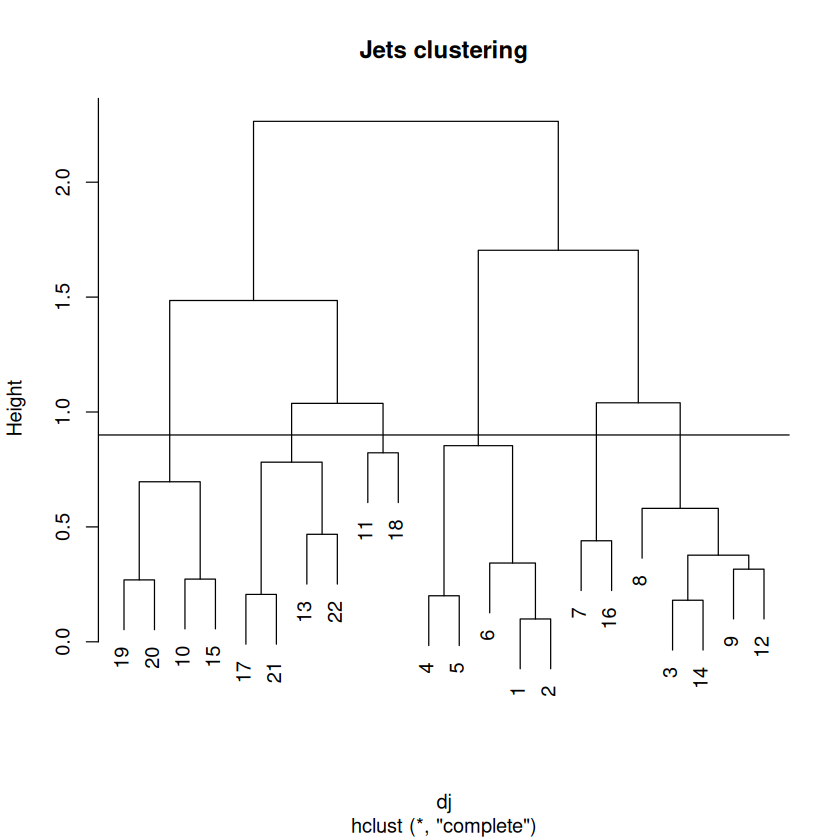

In [18]:
plot(cc, main = "Jets clustering")
abline(h = 0.9)

In [19]:
num_clusters = max(cluster.labels)

for (i in 1:num_clusters) {
    vec = which(cluster.labels == i)
    print(sprintf("Cluster %d: %s", i, toString(vec)), quote=FALSE)
}

[1] Cluster 1: 1, 2, 4, 5, 6
[1] Cluster 2: 3, 8, 9, 12, 14
[1] Cluster 3: 7, 16
[1] Cluster 4: 10, 15, 19, 20
[1] Cluster 5: 11, 18
[1] Cluster 6: 13, 17, 21, 22


### d) Vẽ và giải thích hình 6.6 (trang 174).

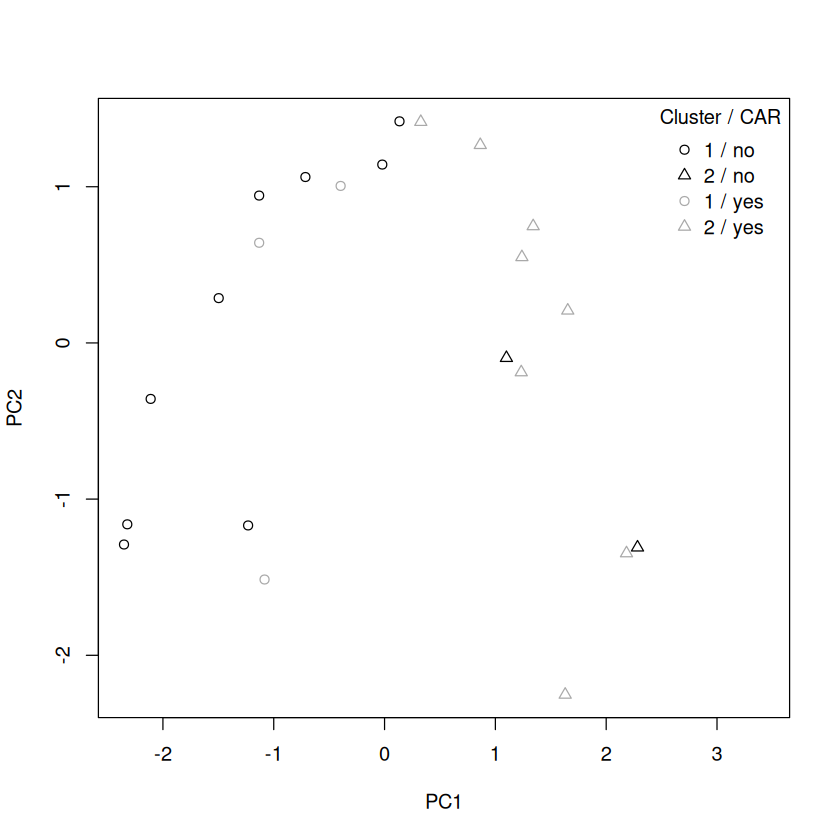

In [20]:
pr <- prcomp(dj)$x[, 1:2]

plot(pr, pch = (1:2)[cutree(cc, k = 2)],
     col = c("black", "darkgrey")[as.numeric(factor(jet$CAR))],
     xlim = range(pr) * c(1, 1.5))

legend("topright", col = c("black", "black",
                           "darkgrey", "darkgrey"),
       legend = c("1 / no", "2 / no", "1 / yes", "2 / yes"),
       pch = c(1:2, 1:2), title = "Cluster / CAR", bty = "n")

**Nhận xét:** Cụm 1 gồm hầu hết các máy bay phản lực không thể hạ cánh trên tàu sân bay. Cụm 2 gồm hầu hết các máy bay phản lực có thể hạ cánh trên tàu sân bay.

## Bài 3: (6.4)

### a) Nhập dữ liệu **crime** vào R.

In [21]:
crime = read.csv('crime.csv')
head(crime)

,State,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,ME,2.0,14.8,28,102,803,2347,164
2,NH,2.2,21.5,24,92,755,2208,228
3,VT,2.0,21.8,22,103,949,2697,181
4,MA,3.6,29.7,193,331,1071,2189,906
5,RI,3.5,21.4,119,192,1294,2568,705
6,CT,4.6,23.8,192,205,1198,2758,447


### b) Vẽ ma trận biểu đồ tán xạ. Nhận xét về bang khác biệt so với các quan sát còn lại.

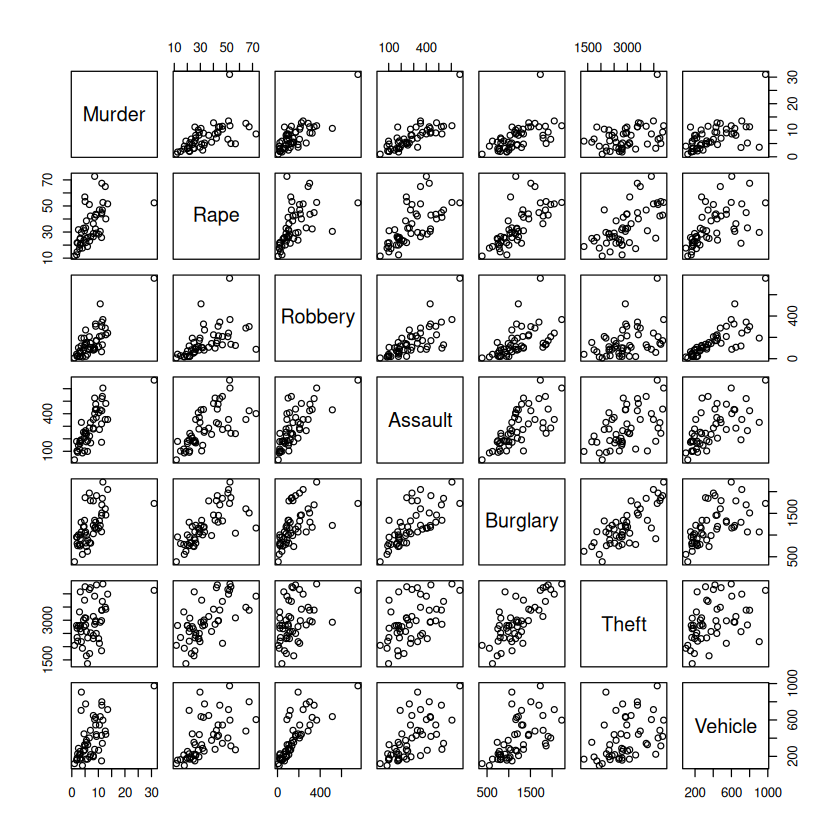

In [22]:
plot(crime[, 2:8])

**Nhận xét:** Có 1 bang có tỉ lệ giết người (Murder) cao hơn hẳn so với các thành phố còn lại.

In [23]:
subset(crime, Murder > 20)

,State,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
24,DC,31,52.4,754,668,1728,4131,975


### c) Vẽ biểu đồ tán xạ thể hiện rõ sự khác biệt của bang đó. Nhận xét về tỷ lệ các tội phạm các loại ở bang đó.

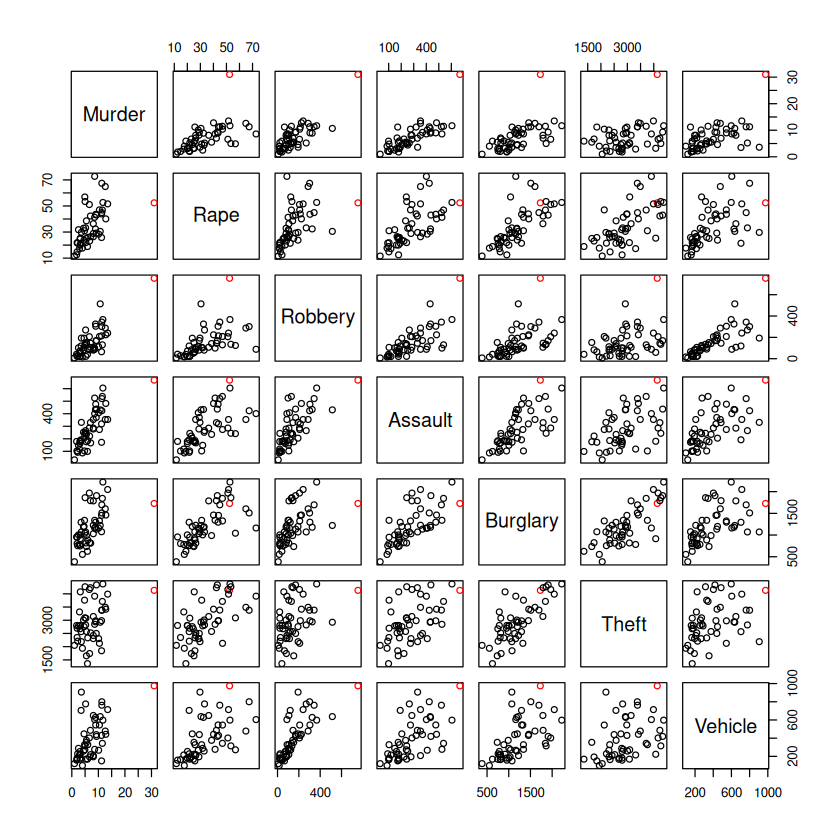

In [24]:
plot(crime[, 2:8], col = ifelse(crime$State == 'DC', 'red', 'black'))

**Nhận xét:** DC có tỉ lệ các loại tội phạm đều rất cao.

### d) Tính phương sai và phương sai sau khi chuẩn hóa của các biến.

In [25]:
sapply(crime[, 2:8], var)

Murder         Rape      Robbery      Assault     Burglary        Theft 
    23.20215    212.31228  18993.37020  22004.31294 177912.83373 582812.83843 
     Vehicle 
 50007.37490

In [26]:
rge <- sapply(crime[, 2:8], function(x) diff(range(x)))
crime_s <- sweep(crime[, 2:8], 2, rge, FUN = "/")
sapply(crime_s, var)

Murder       Rape    Robbery    Assault   Burglary      Theft    Vehicle 
0.02578017 0.05687124 0.03403775 0.05439933 0.05277909 0.06411424 0.06516672

### e) Thực hiện phân cụm K-means với k = 2. Đưa ra tâm (giá trị trung bình) của 2 nhóm. Bang ND và bang SD được xếp vào nhóm nào?

In [27]:
kmeans = kmeans(crime_s, centers = 2)
kmeans$centers * rge

,Murder,Rape,Robbery,Assault,Burglary,Theft,Vehicle
1,4.893103,305.0984,189.592,259.70332,30.99984,540.5436,873.0255
2,21.098015,483.2692,1031.418,19.26029,638.90397,2096.1346,578.6364


In [28]:
kmeans$cluster

[1] 1 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 2 1 2 1 1 1 2 2 2
[39] 1 1 1 2 2 2 1 2 2 2 2 2 1

In [29]:
kmeans$cluster[which(crime$State == 'ND')]

[1] 1

In [30]:
kmeans$cluster[which(crime$State == 'SD')]

[1] 1